One of the reasons our neural network isn’t yet performed as well as it might is because there isn’t anything in the network that takes into account the spatial structure of the input images. In fact, our first step is to flatten the image into a single vector, so that we can pass it to the first Dense layer!

To achieve this we need *convolutional layers*.

## **Convolutional Layers**
First, we need to understand what is meant by a convolution in the context of deep learning.

Figure below shows two different 3 × 3 × 1 portions of a grayscale image being convoluted with a 3 × 3 × 1 filter (or kernel). The convolution is performed by multiplying the filter pixelwise with the portion of the image, and summing the results. The output is more positive when the portion of the image closely matches the filter and more negative when the portion of the image is the inverse of the filter. The top
example resonates strongly with the filter, so it produces a large positive value. The bottom example does not resonate much with the filter, so it produces a value near zero.

<img src="https://raw.githubusercontent.com/cyb0rg14/generative-deep-learning/master/images/cnn1.png" alt="A 3 × 3 convolutional filter applied to two portions of a grayscale image" width="500" height="300">

If we move the filter across the entire image from left to right and top to bottom, recording the convolutional output as we go, we obtain a new array that picks out a particular feature of the input, depending on the values in the filter.For example, down image shows two different filters that highlight horizontal and vertical edges.

<img src="https://raw.githubusercontent.com/cyb0rg14/generative-deep-learning/master/images/cnn2.png" alt="Two convolutional filters applied to a grayscale image" width="500" height="300">

In [1]:
# download the cifar10 dataset

import numpy as np
from tensorflow.keras import datasets, utils

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [2]:
# checking the shapes
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [3]:
# scale the inputs
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# one hot encode the labels
num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

## **Convlutional Layer Visual Representation**
<img src="https://raw.githubusercontent.com/cyb0rg14/generative-deep-learning/master/images/cnn_main.png" alt="CNN layer visual representation">

In [4]:
# build a convolutional neural network
from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(units=128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

output_layer = layers.Dense(units=10, activation='softmax')(x)

model = models.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        1792      
                                                                 
 batch_normalization_3 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 128)               2097280   
                                                             

In [5]:
# compiling the model

from tensorflow.keras import optimizers, models

opt = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# training the model

model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 8ms/step - loss: 1.8589 - accuracy: 0.3699
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5314 - accuracy: 0.4623
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3837 - accuracy: 0.5091
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3011 - accuracy: 0.5406
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2343 - accuracy: 0.5647
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1774 - accuracy: 0.5836
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1337 - accuracy: 0.5998
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0896 - accuracy: 0.6165
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0598 - accuracy: 0.6284
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.

As you might notice, just changing our model from simple ANN to CNN has improved its accuracy by booping 20%. You can also increase accuracy more by increasing the number of epochs and tuning some parameters while model building (it's up to your curiosity what you want to do).

In [7]:
# evaluating the model

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2620 - accuracy: 0.5615


[1.261979341506958, 0.5615000128746033]

In [8]:
# viewing predictions on test set

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 2ms/step


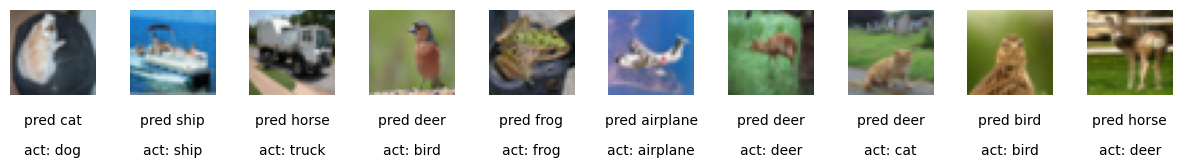

In [13]:
# displaying predict of neural network against actual labels

import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act: ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)